# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have choosen the TMDb movie data set for data analysis which contains 10,000 movies dataset. It has some intresting columns in the dataset for my analysis.

**Contain:**

>Total number of Rows = 10866

>Total number of Columns = 21

>Seeing the dataset we can say that the dataset contains null values.

**Questions:**
>1.Which Movie Has The Highest Or Lowest Profit?

>3.Which Month Released Highest Number Of Movies In All Of The Years?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

>After observing this Dataset and the questions which i have been selected for my analysy purpose. We will be keeping only valuable data

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
tmdb=pd.read_csv('tmdb-movies.csv')

In [3]:
# print the concise summery of the dataset
tmdb.info()
#print Numbers of Rows & Columns Present in Data Set
print('Rows {} Columns {}'.format(tmdb.shape[0],tmdb.shape[1])) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#print first few rows of the Data Set
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#print last few rows of the Data Set
tmdb.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


**Observation**

**The columns of 'budget','revenue','budget_adj','revenue_adj'has not given in this dataset,but for this dataset i will consider the currency is in US dollor
The dataset contains lots of movies where the budget or revenue have a value of 0**

In [6]:
#print concise summery of the dataset
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


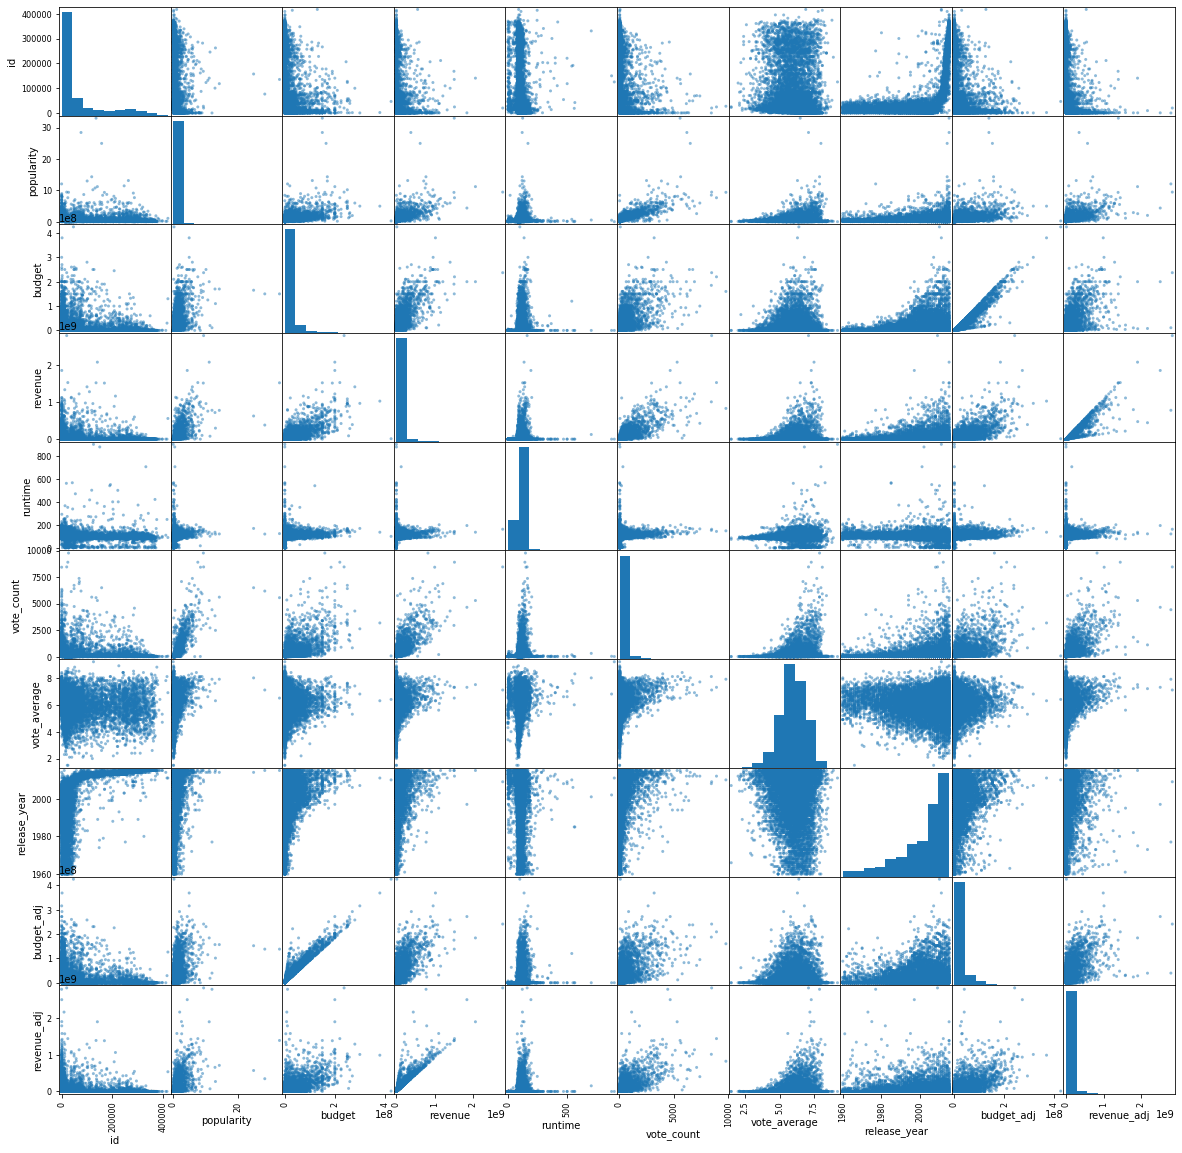

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(tmdb,figsize=(20,20))
plt.show()

In [8]:
#Null Value contains in Dataset
tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Removing the unused Information from the Dataset )

**1.I have to remove duplicates data from the Dataset**

**2.I have to change the format of release date into datetime format**

**3.I will remove the unused columns for my analysis**

**4.I will Remove the movies which are having zero value of budget and revenue** 

**Remove Duplicates Data**

In [9]:
#Numbers of Duplicates Data present in Dataset
tmdb.duplicated().sum()

1

In [10]:
tmdb.drop_duplicates(inplace=True)
#print to check after removed the duplicate value from this data
tmdb.shape

(10865, 21)

**Remove the Unused Columns**
>We can see that 21 columns present in our database.I can remove some coulumns which are not required for my analysis. I will remove this columns: 
imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis and I will drop these columns.

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
tmdb.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr cleaning unused coulumns: (Rows,Columns) : ",tmdb.shape)


Afetr cleaning unused coulumns: (Rows,Columns) :  (10865, 15)


**Drop theses rows which contain incorrect or inappropriate values**

>From this dataset we can see that there are lots of movies which has budget and Revenue value is 0 which implies that calculating these values are unnecessary.  

In [12]:
# Checking for an zero values in the budget and revenue columns
print("Rows of zero values in The Budget Column:",tmdb[(tmdb['budget']==0)].shape[0])
print("Rows of zero values in The Revenue Column:",tmdb[(tmdb['revenue']==0)].shape[0])

Rows of zero values in The Budget Column: 5696
Rows of zero values in The Revenue Column: 6016


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which Movie Has The Highest Or Lowest Profit?

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [14]:
#Calculate Profit for each of the movie and added a new profit column in the dataframe.
tmdb['Profit']=tmdb['revenue']-tmdb['budget']

In [15]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
#cal function calculate minimum and maximum value
def cal(temp):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_id= tmdb[temp].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_id = tmdb[temp].idxmax()
    high = pd.DataFrame(tmdb.loc[high_id,:])
    low = pd.DataFrame(tmdb.loc[min_id,:])
    
    #print the movie having high and low profit
    print("Highest profit Movie "+temp+ " : ",tmdb['original_title'][high_id])
    print("Lowest profit Movie "+temp+ "  : ",tmdb['original_title'][min_id])
    return pd.concat([high,low],axis = 1)

#call the function to find min and max value.
cal('Profit')

Highest profit Movie Profit :  Avatar
Lowest profit Movie Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


**The First column shows the highest profit and Second column shows that the lowest Profit**

**The movie Avtar has highest profit and the movie The Warrior's Way has lowest profit.**

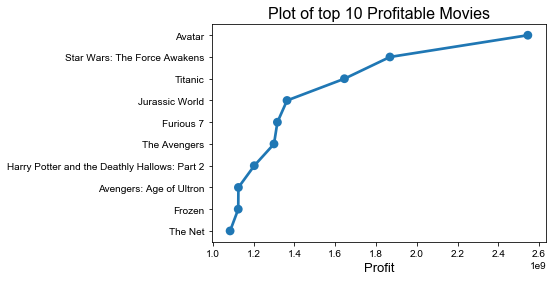

In [16]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
df= pd.DataFrame(tmdb['Profit'].sort_values(ascending = False))
df['original_title'] = tmdb['original_title']
data = list(map(str,(df['original_title'])))
x = list(data[:10])
y = list(df['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ppt = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,8)})
#setup the title and labels of the plot.
ppt.set_title("Plot of top 10 Profitable Movies",fontsize = 16)
ppt.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")


### Research Question 2: Which Year Has The Highest Profit Rate?

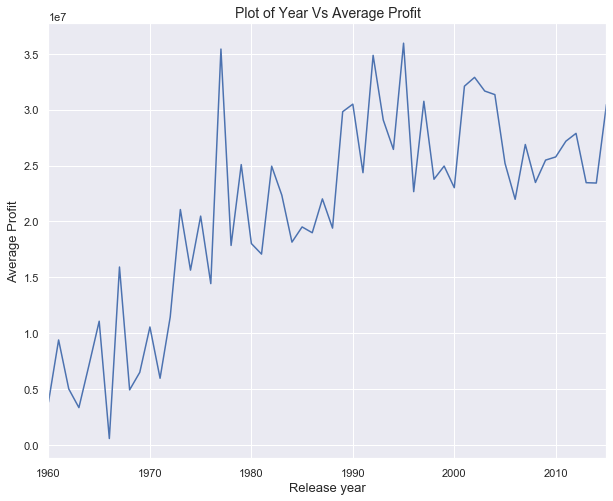

In [17]:
#do year-wise analysis of profit earn by movies in each earn.
#take the average of profit made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean profit and plot.
tmdb.groupby('release_year')['Profit'].mean().plot()

#setup the title and labels of the figure.
plt.title("Plot of Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})

### Research Question 3: Which Month Released Highest Number Of Movies In All Of The Years?

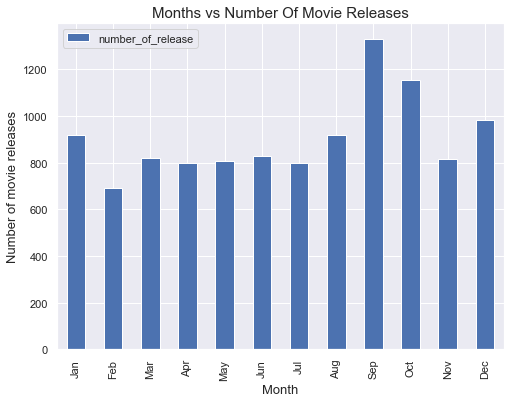

In [18]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])
tmdb['release_date'].head()

#extract the month number from the release date.
month_release_number = tmdb['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release_number.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

### Which Genre Has The Highest Release Of Movies?

**I will use here univariet analysis to answer this Question.** 

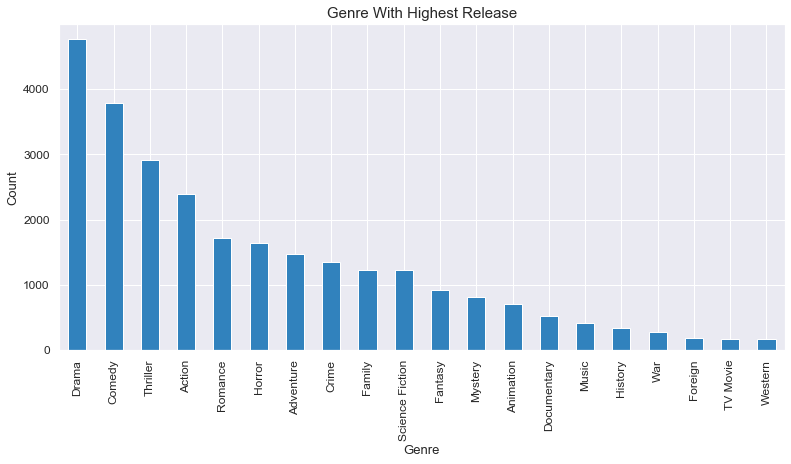

In [19]:
#make a function will split the string and return the count of each genre.
def genre_count(x):
    #concatenate all the rows of the genrs.
    data_plot = tmdb[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    c = data.value_counts(ascending=False)
    return c

#call the function for counting the movies of each genre.
total_genre_movies = genre_count('genres')
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Genre',fontsize=13)
plt.ylabel("Count",fontsize= 13)
sns.set_style("whitegrid")

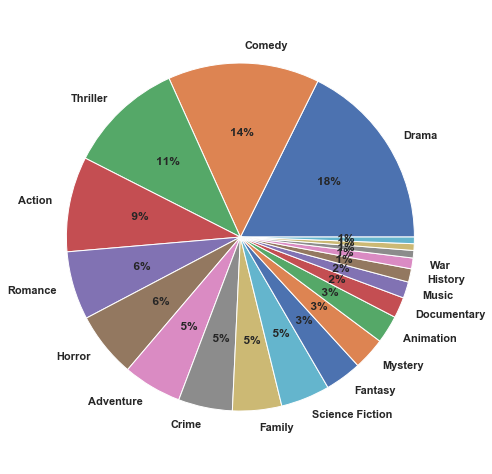

In [20]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(7,7))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct ='%2.0f%%',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

## How does popularity affect the profit?

**I will use here Bivariet analysis to answer this Question.**

0.6289972839642592

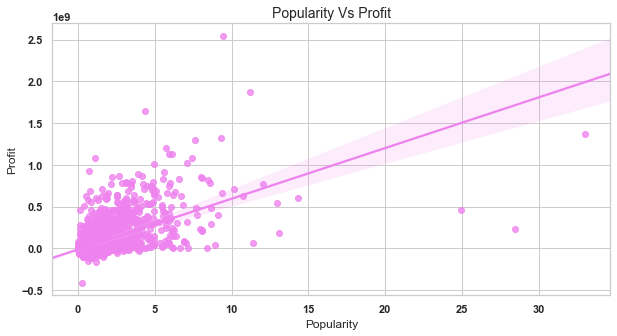

In [21]:
#Scatter plot.
ax=sns.regplot(x=tmdb['popularity'],y=tmdb['Profit'],color='violet')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=14)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(4,6)})


def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(tmdb['popularity'],tmdb['Profit'])

**From the above plot we saw that there is positive correlation in between Popularity & Profit as well as it has uphill direction which implies that less desirable result and it is possible because of movie with high budget and low profit and other similar condition.** 

<a id='conclusions'></a>
## Conclusions

>**1.Avatar Movie has highest profit as well as the movie The Warrior's Way has lowest profit**.

>**2.The plot shows that year 2002-03 he most profitable years And the profit was very low between the years 1960 and 1970.**

>**3.September month Released Highest Number Of Movies**

## Limitations

>It's not 100% sure that the solution formulas is going to work, But it shows us that we have high probability of making high profits.